In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("EURUSD30.csv", sep="\t", names=['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume'], index_col=0, parse_dates=True)
df

,Open,High,Low,Close,Volume
DateTime,,,,,
2017-12-13 10:30:00,1.17483,1.17511,1.17461,1.17510,4318
2017-12-13 11:00:00,1.17512,1.17514,1.17441,1.17443,4270
2017-12-13 11:30:00,1.17442,1.17444,1.17381,1.17393,4540
2017-12-13 12:00:00,1.17392,1.17427,1.17334,1.17351,5130
2017-12-13 12:30:00,1.17351,1.17401,1.17300,1.17401,5204
...,...,...,...,...,...
2021-12-20 11:30:00,1.12723,1.12767,1.12681,1.12703,1144
2021-12-20 12:00:00,1.12704,1.12765,1.12683,1.12713,1345
2021-12-20 12:30:00,1.12714,1.12746,1.12680,1.12685,1589


In [53]:
df[df.isnull().sum(axis=1) > 0]

,Open,High,Low,Close,Volume
DateTime,,,,,


In [54]:
#D - resample, by day
df_daily = df.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

In [55]:
df_daily

,Open,High,Low,Close,Volume
DateTime,,,,,
2017-12-13,1.17483,1.18404,1.17294,1.18361,159374
2017-12-14,1.18361,1.18625,1.17645,1.17745,241280
2017-12-15,1.17745,1.18123,1.17488,1.17492,200462
2017-12-16,NaN,NaN,NaN,NaN,0
2017-12-17,1.17441,1.17509,1.17377,1.17432,8500
...,...,...,...,...,...
2021-12-16,1.12903,1.13603,1.12811,1.13336,81934
2021-12-17,1.13335,1.13488,1.12350,1.12370,71994
2021-12-18,NaN,NaN,NaN,NaN,0


In [56]:
df_daily[df_daily.isnull().sum(axis=1) > 0]

,Open,High,Low,Close,Volume
DateTime,,,,,
2017-12-16,NaN,NaN,NaN,NaN,0
2017-12-23,NaN,NaN,NaN,NaN,0
2017-12-30,NaN,NaN,NaN,NaN,0
2017-12-31,NaN,NaN,NaN,NaN,0
2018-01-06,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...
2021-11-20,NaN,NaN,NaN,NaN,0
2021-11-27,NaN,NaN,NaN,NaN,0
2021-12-04,NaN,NaN,NaN,NaN,0


In [57]:
df_daily = df_daily.dropna()
df_daily

,Open,High,Low,Close,Volume
DateTime,,,,,
2017-12-13,1.17483,1.18404,1.17294,1.18361,159374
2017-12-14,1.18361,1.18625,1.17645,1.17745,241280
2017-12-15,1.17745,1.18123,1.17488,1.17492,200462
2017-12-17,1.17441,1.17509,1.17377,1.17432,8500
2017-12-18,1.17432,1.18342,1.17420,1.17837,199846
...,...,...,...,...,...
2021-12-15,1.12575,1.12991,1.12215,1.12902,114369
2021-12-16,1.12903,1.13603,1.12811,1.13336,81934
2021-12-17,1.13335,1.13488,1.12350,1.12370,71994


In [58]:
df_daily['DailyReturn'] = ((df_daily['Close'] - df_daily['Open']) / df_daily['Open']) * 100

C:\Users\pauli\AppData\Local\Temp\ipykernel_11440\578947849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily['DailyReturn'] = ((df_daily['Close'] - df_daily['Open']) / df_daily['Open']) * 100


In [59]:
df_daily['DailyReturn']

DateTime
2017-12-13    0.747342
2017-12-14   -0.520442
2017-12-15   -0.214871
2017-12-17   -0.007663
2017-12-18    0.344880
                ...   
2021-12-15    0.290473
2021-12-16    0.383515
2021-12-17   -0.851458
2021-12-19    0.050725
2021-12-20    0.449184
Name: DailyReturn, Length: 1257, dtype: float64

In [60]:
mean_daily_return = df_daily['DailyReturn'].mean()
std_daily_return = df_daily['DailyReturn'].std()

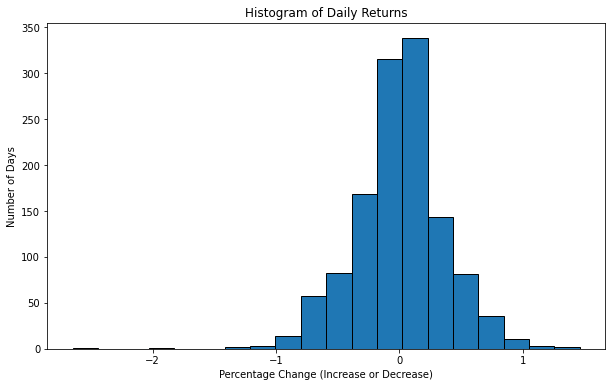

In [61]:
df_daily['DailyReturn'].hist(bins=20, edgecolor='black', grid=False, figsize=(10, 6))
plt.title('Histogram of Daily Returns')
plt.xlabel('Percentage Change (Increase or Decrease)')
plt.ylabel('Number of Days')
plt.show()

In [62]:
df_daily.loc[:, 'ThreeDayReturn'] = ((df_daily['Close'] - df_daily['Open'].shift(2)) / df_daily['Open'].shift(2)) * 100

C:\Users\pauli\AppData\Local\Temp\ipykernel_11440\2869843395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily.loc[:, 'ThreeDayReturn'] = ((df_daily['Close'] - df_daily['Open'].shift(2)) / df_daily['Open'].shift(2)) * 100


In [63]:
df_daily['ThreeDayReturn']

DateTime
2017-12-13         NaN
2017-12-14         NaN
2017-12-15    0.007661
2017-12-17   -0.784887
2017-12-18    0.078135
                ...   
2021-12-15   -0.180362
2021-12-16    0.444901
2021-12-17   -0.182101
2021-12-19   -0.420715
2021-12-20   -0.356465
Name: ThreeDayReturn, Length: 1257, dtype: float64

In [64]:
mean_three_day_return = df_daily['ThreeDayReturn'].mean()
std_three_day_return = df_daily['ThreeDayReturn'].std()

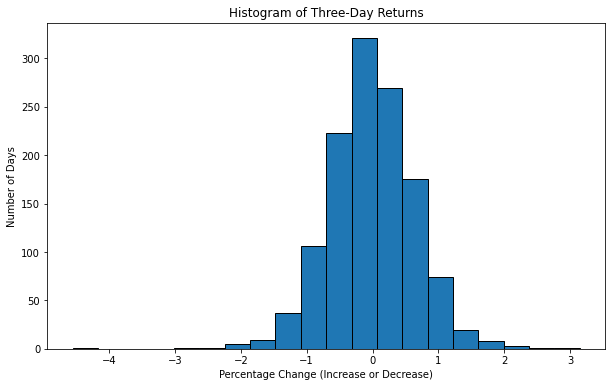

In [65]:
df_daily['ThreeDayReturn'].hist(bins=20, edgecolor='black', grid=False, figsize=(10, 6))
plt.title('Histogram of Three-Day Returns')
plt.xlabel('Percentage Change (Increase or Decrease)')
plt.ylabel('Number of Days')
plt.show()